**Imported Dataset**

In [71]:
import pandas as pd
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Temperature and humidity have an inversely proportional relationship. The humidity will decrease as temperature rises.**

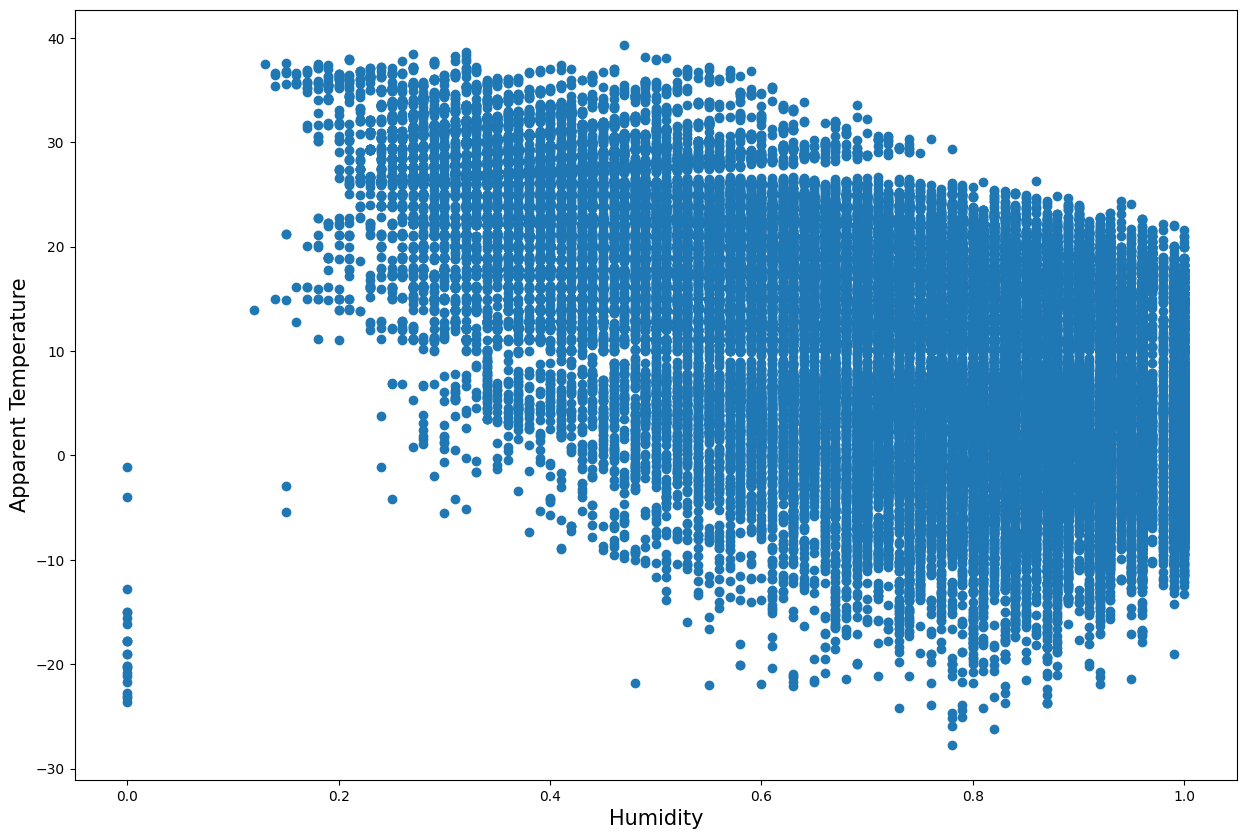

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.xlabel('Humidity', fontsize=15)
plt.ylabel('Apparent Temperature', fontsize=15)
plt.scatter(df['Humidity'], df['Apparent Temperature (C)'])

**Dividing dataset into train set and test set**

In [73]:
x= df["Humidity"]
y= df["Apparent Temperature (C)"]
test_size = int(len(x)*0.3)
train_size = len(x)-test_size
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[-test_size:]
y_test = y[-test_size:]

**Linear Regression model**

In [74]:

class Regressor():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def Find_w(self):
        X = self.x.mean()
        Y = self.y.mean()
        sum_prod_x_y=0
        sum_diff_x = 0
        for (xi,yi) in zip(self.x,self.y):
            sum_prod_x_y=sum_prod_x_y+((yi-Y) * (xi-X))
            sum_diff_x = sum_diff_x + ((xi-X)**2)
        w = sum_prod_x_y/sum_diff_x
        return w
    def Find_d(self):
        w = self.Find_w()
        Y = self.y.mean()
        X = self.x.mean()
        d = Y - w*X
        return d
    def fit(self,x_test):
        w = self.Find_w()
        d = self.Find_d()
        y_pred = []
        if type(x_test) == float or type(x_test)==int:
            y_p = (w*x_test)+d
            y_pred.append(y_p)
        for xi in x_test:
            y_p = (w*xi)+d
            y_pred.append(y_p)
        return y_pred


**Training Model and predictions**

In [88]:
reg = Regressor(x_train,y_train)
y_pred = reg.fit(x_test)
y_pred

[10.953841554830518,
 13.684068482762918,
 13.684068482762918,
 16.414295410695317,
 19.144522338627723,
 19.82707907061082,
 20.850914168585476,
 22.557305998543224,
 22.557305998543224,
 22.898584364534777,
 23.239862730526326,
 22.216027632551672,
 22.557305998543224,
 19.82707907061082,
 12.660233384788267,
 11.63639828681362,
 7.1997795289234645,
 6.517222796940363,
 3.445717503016411,
 8.223614626898112,
 8.564892992889664,
 6.175944430948814,
 7.541057894915017,
 10.612563188838966,
 12.318955018796714,
 13.001511750779816,
 14.707903580737568,
 20.16835743660237,
 20.850914168585476,
 22.216027632551672,
 22.557305998543224,
 22.557305998543224,
 22.557305998543224,
 22.216027632551672,
 21.192192534577025,
 19.144522338627723,
 16.414295410695317,
 14.02534684875447,
 13.001511750779816,
 10.953841554830518,
 4.128274234999509,
 3.445717503016411,
 3.104439137024862,
 3.104439137024862,
 1.7393256730586586,
 1.7393256730586586,
 1.7393256730586586,
 1.3980473070671096,
 1.3980

**Mean Square error of Regression Model**

In [89]:
def mean_square_error(y_test,y_pred):
    msq_err = 0
    for (y_t,y_p) in zip(y_test,y_pred):
        msq_err = msq_err+((y_p-y_t)**2)/len(y_test)
    return msq_err**(1/2)
mse1=mean_square_error(y_test,y_pred)
mse1

8.02520124902258

**L1 regularization Model**

In [77]:
class L1_Regression():
    def __init__(self,x_train,y_train,lamda):
        self.x = x_train
        self.y = y_train
        self.lamda = lamda
    def Find_w(self):
        alpha = self.lamda
        X = self.x.mean()
        Y = self.y.mean()
        a = X/(1+alpha)
        b = Y/(1+alpha)
        N = len(self.x)
        sum_prod_x_y=0
        sum_diff_x = 0
        for (xi,yi) in zip(self.x,self.y):
            sum_prod_x_y=sum_prod_x_y+((yi-Y) * (xi-X))
            sum_diff_x = sum_diff_x + ((xi-X)**2)
        w = (sum_prod_x_y+(N*alpha*b*a))/(sum_diff_x-(alpha*N*(a**2)))
        return w
    def Find_d(self):
        X = self.x.mean()
        Y = self.y.mean()
        w = self.Find_w()
        d=(Y-w*X)/(1+self.lamda)
        return d
    def fit(self,x_test):
        w = self.Find_w()
        d = self.Find_d()
        y_pred = []
        if type(x_test) == float or type(x_test)==int:
            y_p = (w*x_test)+d
            y_pred.append(y_p)
        for xi in x_test:
            y_p = (w*xi)+d
            y_pred.append(y_p)
        return y_pred

**Training the model and predictions**

In [91]:
reg2 = L1_Regression(x_train,y_train,5)
y_pred2 = reg2.fit(x_test)
y_pred2

[6.405675825932387,
 5.78639116358799,
 5.78639116358799,
 5.167106501243595,
 4.547821838899198,
 4.393000673313099,
 4.16076892493395,
 3.7737160109687022,
 3.7737160109687022,
 3.6963054281756524,
 3.618894845382603,
 3.8511265937617516,
 3.7737160109687022,
 4.393000673313099,
 6.01862291196714,
 6.250854660346287,
 7.257192236655931,
 7.412013402242031,
 8.108708647379476,
 7.0249604882767835,
 6.947549905483734,
 7.4894239850350806,
 7.179781653862882,
 6.483086408725436,
 6.096033494760189,
 5.94121232917409,
 5.554159415208842,
 4.3155900905200495,
 4.16076892493395,
 3.8511265937617516,
 3.7737160109687022,
 3.7737160109687022,
 3.7737160109687022,
 3.8511265937617516,
 4.0833583421409,
 4.547821838899198,
 5.167106501243595,
 5.7089805807949405,
 5.94121232917409,
 6.405675825932387,
 7.9538874817933785,
 8.108708647379476,
 8.186119230172526,
 8.186119230172526,
 8.495761561344725,
 8.495761561344725,
 8.495761561344725,
 8.573172144137775,
 8.573172144137775,
 8.49576156134

**Mean square error of L1 regularization model**

In [92]:
mse2=mean_square_error(y_test,y_pred2)
mse2

11.658151476346172

**L2 regularization Model**

In [80]:
class L2_Regression():
    def __init__(self,x_train,y_train,lamda):
        self.x = x_train
        self.y = y_train
        self.lamda = lamda
    def Find_w(self):
        a = self.lamda/2
        X = self.x.mean()
        Y = self.y.mean()
        sum_xi_X_2 = 0
        sum_xi_X =0 
        sum_yi_xi =0
        for (xi,yi) in zip(self.x,self.y):
            sum_yi_xi = sum_yi_xi + ((yi-Y)*(xi-X))
            sum_xi_X = sum_xi_X + (xi-X)
            sum_xi_X_2 = sum_xi_X_2 + ((xi-X)**2)
        w = (sum_yi_xi - a*sum_xi_X)/sum_xi_X_2
        return w
    def Find_d(self):
        a = self.lamda/2
        X = self.x.mean()
        Y = self.y.mean()
        w = self.Find_w()
        d = (Y-w*X)+a
        return d
    def fit(self,x_test):
        w = self.Find_w()
        d = self.Find_d()
        y_pred = []
        if type(x_test) == float or type(x_test)==int:
            y_p = (w*x_test)+d
            y_pred.append(y_p)
        for xi in x_test:
            y_p = (w*xi)+d
            y_pred.append(y_p)
        return y_pred

**Training the model and predictions**

In [93]:
reg3 = L2_Regression(x_train,y_train,5)
y_pred3 = reg3.fit(x_test)
y_pred3

[13.453841554830518,
 16.18406848276292,
 16.18406848276292,
 18.91429541069532,
 21.644522338627727,
 22.327079070610825,
 23.350914168585476,
 25.057305998543228,
 25.057305998543228,
 25.398584364534777,
 25.73986273052633,
 24.71602763255168,
 25.057305998543228,
 22.327079070610825,
 15.160233384788267,
 14.13639828681362,
 9.699779528923468,
 9.017222796940366,
 5.945717503016411,
 10.723614626898115,
 11.064892992889664,
 8.675944430948814,
 10.041057894915017,
 13.112563188838969,
 14.818955018796718,
 15.50151175077982,
 17.20790358073757,
 22.668357436602378,
 23.350914168585476,
 24.71602763255168,
 25.057305998543228,
 25.057305998543228,
 25.057305998543228,
 24.71602763255168,
 23.69219253457703,
 21.644522338627727,
 18.91429541069532,
 16.52534684875447,
 15.50151175077982,
 13.453841554830518,
 6.628274234999509,
 5.945717503016411,
 5.604439137024862,
 5.604439137024862,
 4.239325673058659,
 4.239325673058659,
 4.239325673058659,
 3.8980473070671096,
 3.89804730706710

**Mean Square error L2 regularization model**

In [94]:
mse3=mean_square_error(y_test,y_pred3)
mse3

7.9891194292056

In [83]:
print('Mean Square Error of Linear regression model',mse1)
print('Mean Square Error of Linear regression model with L1 regularization',mse2)
print('Mean Square Error of Linear regression model with L2 regularization',mse3)

Mean Square Error of Linear regression model 8.02520124902258
Mean Square Error of Linear regression model with L1 regularization 11.658151476346172
Mean Square Error of Linear regression model with L2 regularization 7.9891194292056


**Best Fit model(Linear regression with L2 regularization)**

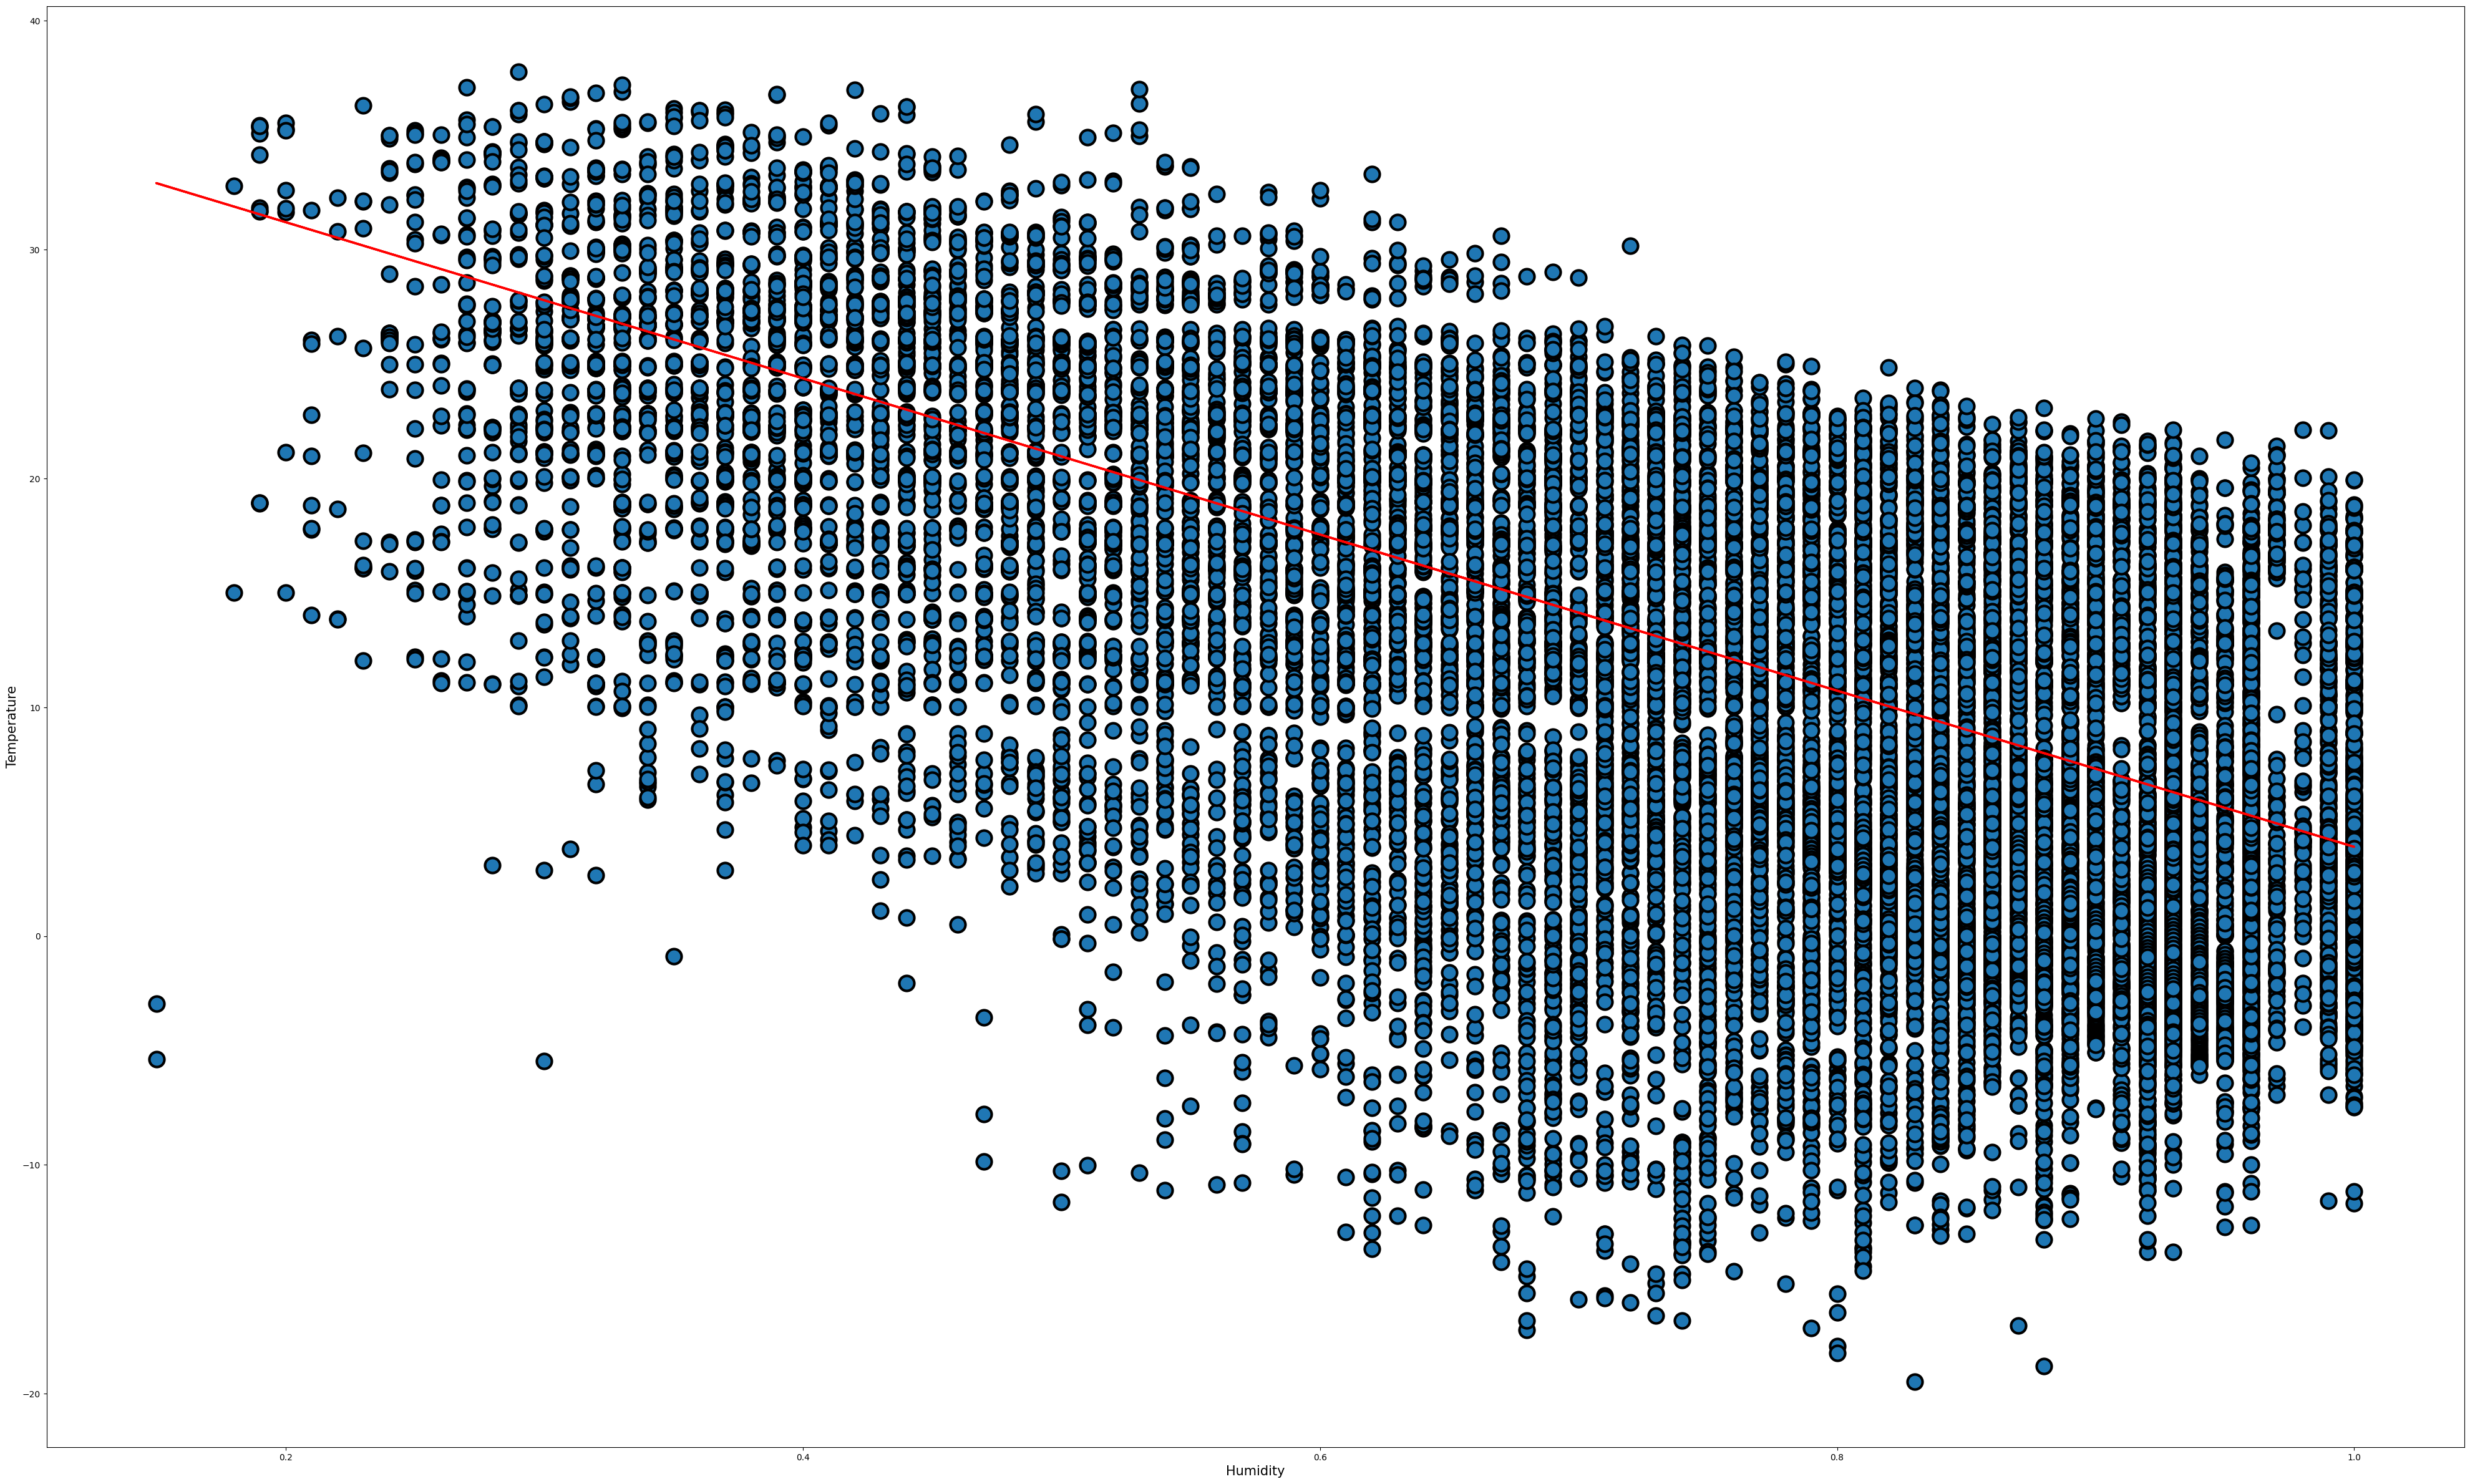

In [95]:
import matplotlib.pyplot as plt
w = reg3.Find_w()
d = reg3.Find_d()
plt.figure(figsize=(50,30))
plt.xlabel('Humidity', fontsize=15)
plt.ylabel('Temperature', fontsize=15)
plt.scatter(x_test, y_test, s=300, linewidths=3, edgecolor='black')
plt.plot(x_test, d + w*x_test, c = 'r', linewidth=2.5, alpha=1, solid_capstyle='round')
#plt.scatter(x=x_train.mean(), y=y_train.mean(), marker='*', s=10**2.5, c='r')